In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# load the data sets into pandas dataframe data structure
df_cpi = pd.read_csv("cpi.csv")
df_rgdp = pd.read_csv("rgdp.csv")
df_ngdp = pd.read_csv("ngdp.csv")
df_defl = pd.read_csv("gdp_deflator.csv")

In [ ]:
# exatract data specific to germany
cpi_germany = df_cpi[df_cpi['Country Name'] == 'Germany']
ngdp_germany = df_ngdp[df_ngdp['Country Name'] == 'Germany']
rgdp_germany = df_rgdp[df_rgdp['Country Name'] == 'Germany']
defl_germany = df_defl[df_defl['Country Name'] == 'Germany']

In [ ]:
# populate a list with years in consideration
years = [ str(year) for year in range(1960, 2025) ]

In [ ]:
# calculate the gdp deflation for each year using the formula: defl = ngdp/rgdp * 100
defl_computed = {}
for year in years:
    defl_computed[year] = (ngdp_germany[year] / rgdp_germany[year]) * 100

In [ ]:
# extract the values for each year and store as a list
ngdp_values = [ ngdp_germany[year] for year in years ]
rgdp_values = [ rgdp_germany[year] for year in years ]
cpi_values = [ cpi_germany[year] for year in years ]
deflator_values = [ defl_germany[year] for year in years ]

Series([], Name: 1960, dtype: float64)


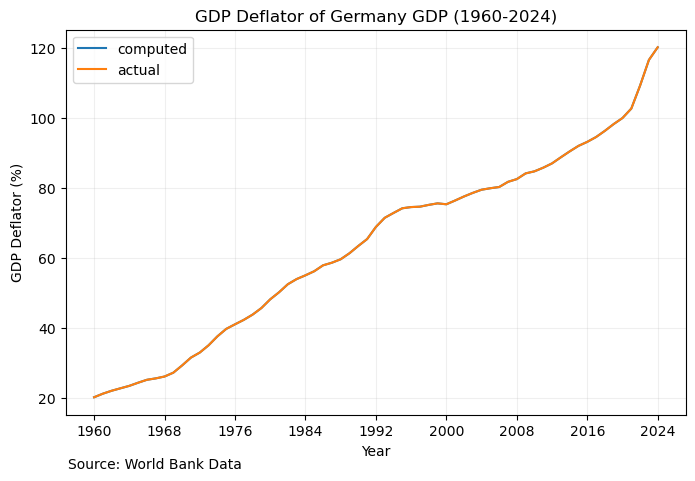

In [ ]:
# plot the grpah of the computed and actual gdp deflator for germany
defl_germany_values = [ defl_germany[year] for year in years ]
plt.figure(figsize=(8,5))
plt.plot(years, list(defl_computed.values()), label="computed")
plt.plot(years, defl_germany_values, label="actual")
plt.grid(alpha=0.2)
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="GDP Deflator (%)")
plt.title("GDP Deflator of Germany GDP (1960-2024)")
plt.xticks(ticks=years[::8], rotation=0, ha='center')
plt.text(-3, 0, s="Source: World Bank Data")
plt.legend()
plt.show()

In [56]:
# first and latest values of rgdp, ngdp
print(f"The value of rGDP in 1960 was {rgdp_values[0]} and the value of rGDP in 2024 was {rgdp_values[-1]}.")
print(f"The value of nGDP in 1960 was {ngdp_values[0]} and the value of nGDP in 2024 was {ngdp_values[-1]}.")

The value of rGDP in 1960 was 55    8.989440e+11
Name: 1960, dtype: float64 and the value of rGDP in 2024 was 55    3.600830e+12
Name: 2024, dtype: float64.
The value of nGDP in 1960 was 55    1.817150e+11
Name: 1960, dtype: float64 and the value of nGDP in 2024 was 55    4.328970e+12
Name: 2024, dtype: float64.


In [179]:
# compute the aagr of gdp deflator
aagr_gdp_defl = (math.e**(math.log(deflator_values[-1]/deflator_values[0]) / len(years)) - 1) * 100
aagr_gdp_defl

/var/folders/bs/j9ww8bm55_j9bc_3kbwlvddm0000gp/T/ipykernel_9782/1428742356.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aagr_gdp_defl = (math.e**(math.log(deflator_values[-1]/deflator_values[0]) / len(years)) - 1) * 100


2.780964822446985

In [ ]:
# compute the percentage change in gdp deflator
deflator_change = []
for idx, year in enumerate(years):
    if idx != 0:
        deflator_change.append( (deflator_values[idx] / deflator_values[idx - 1] - 1) * 100  )

# compute the percentage change in cpi
cpi_change = []
for idx, year in enumerate(years):
    if idx != 0:
        cpi_change.append( (cpi_values[idx] / cpi_values[idx - 1] - 1) * 100 )

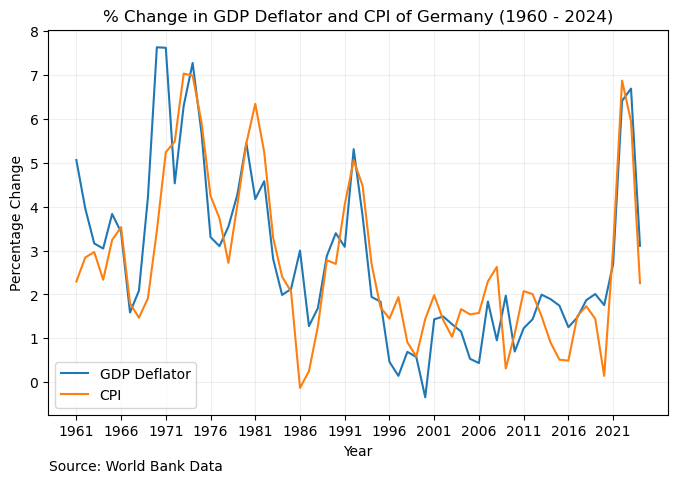

In [ ]:
# plot the gdp deflator vs cpi percentage change graph
plt.figure(figsize=(8,5))
plt.plot(years[1:], deflator_change, label="GDP Deflator")
plt.plot(years[1:], cpi_change, label="CPI")
plt.xticks(ticks=years[1:-1:5])
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.grid(alpha=0.2)
plt.title("% Change in GDP Deflator and CPI of Germany (1960 - 2024)")
plt.text(x=-3, y=-2, s="Source: World Bank Data")
plt.legend()

In [184]:
# convert ngdp and rgdp values into floating points for data computation
ngdp_values = [ float(value) for value in ngdp_values ]
rgdp_values = [ float(value) for value in rgdp_values ]

pct_rgdp_growth = (rgdp_values[-1]/rgdp_values[0] - 1)*100
pct_ngdp_growth = (ngdp_values[-1]/ngdp_values[0] - 1)*100
aagr_ngdp_growth = ((ngdp_values[-1]/ngdp_values[0])**(1/len(ngdp_values)) - 1)*100
aagr_rgdp_growth = ((rgdp_values[-1]/rgdp_values[0])**(1/len(rgdp_values)) - 1)*100

print(f"Percentage growth:\trGDP: {pct_rgdp_growth}\tnGDP: {pct_ngdp_growth}")
print(f"AAGR growth:\trGDP: {aagr_rgdp_growth}\tnGDP: {aagr_ngdp_growth}")


Percentage growth:	rGDP: 300.56221522141533	nGDP: 2282.2854469911676
AAGR growth:	rGDP: 2.1578738988156543	nGDP: 4.998844555250503
